In [61]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Model validation

1. load iris from sklearn's dataset
2. choose the class of model: k-neighbor classifier
3. build the model with n_neighbors as 1
4. fit, apply and check accuracy_score
5. What's wrong?
6. holdout sets by splitting the train and test data
7. cross validation (2-fold, multi-fold, leave-one-out, )
http://scikit-learn.org/stable/modules/cross_validation.html
8. 

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y_model, y)

1.0

In [22]:
from sklearn.cross_validation import train_test_split

In [28]:
X1, X2, y1, y2 = train_test_split(X, y,
random_state=0, train_size = 0.5)

In [29]:
model.fit(X1,y1)
y2_model = model.predict(X2)
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.90666666666666662

In [30]:
model.fit(X2,y2)
y1_model = model.predict(X1)
from sklearn.metrics import accuracy_score
accuracy_score(y1, y1_model)

0.95999999999999996

In [35]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv = 5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [41]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut(len(X)))
scores.mean()

0.95999999999999996

1. define polynomial with different order
2. create data


In [49]:
rng = np.random.RandomState(1)
X = rng.rand(40,1)**2

In [55]:
X.shape

(40, 1)

In [59]:
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

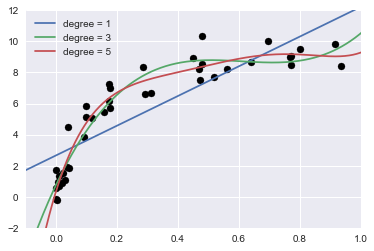

In [81]:
plt.scatter(X.ravel(),y,color = 'black')
X_test = np.linspace(-0.1,1.1,500)[:, None]
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')
#y_test = PolynomialRegression(3).predict(X_test)

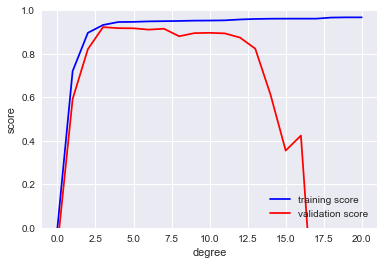

In [86]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv =7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')